Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Importing and Reading the data

In [10]:
taxi_Aug2025_data = pd.read_parquet('Data/yellow_tripdata_2025-08.parquet')
taxi_df = pd.concat([taxi_Aug2025_data])

In [14]:
taxi_df.shape
taxi_df.head(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-08-01 00:52:23,2025-08-01 01:12:20,1.0,8.44,1.0,N,138,141,1,33.8,6.00,0.5,5.00,6.94,1.0,57.49,2.5,1.75,0.00
1,2,2025-08-01 00:03:01,2025-08-01 00:15:33,2.0,4.98,1.0,N,138,193,1,21.2,6.00,0.5,0.00,0.00,1.0,30.45,0.0,1.75,0.00
2,7,2025-08-01 00:24:38,2025-08-01 00:24:38,2.0,1.89,1.0,N,249,45,1,14.2,0.00,0.5,3.99,0.00,1.0,23.94,2.5,0.00,0.75
3,7,2025-08-01 00:48:19,2025-08-01 00:48:19,1.0,2.35,1.0,N,79,229,1,11.4,0.00,0.5,3.43,0.00,1.0,20.58,2.5,0.00,0.75
4,2,2025-08-01 00:25:34,2025-08-01 00:33:18,1.0,2.14,1.0,N,43,48,1,11.4,1.00,0.5,2.57,0.00,1.0,19.72,2.5,0.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2025-08-01 00:58:10,2025-08-01 01:09:49,1.0,3.80,1.0,N,79,87,1,17.0,4.25,0.5,4.55,0.00,1.0,27.30,2.5,0.00,0.75
96,1,2025-08-01 00:11:45,2025-08-01 00:20:40,1.0,1.50,1.0,N,68,162,1,10.0,4.25,0.5,1.00,0.00,1.0,16.75,2.5,0.00,0.75
97,2,2025-08-01 00:28:21,2025-08-01 00:47:56,2.0,2.88,1.0,N,148,68,2,19.8,1.00,0.5,0.00,0.00,1.0,25.55,2.5,0.00,0.75
98,2,2025-08-01 00:49:19,2025-08-01 01:16:32,1.0,16.88,1.0,N,132,155,2,63.9,1.00,0.5,0.00,0.00,1.0,68.15,0.0,1.75,0.00


In [15]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [16]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']]

In [17]:
taxi_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2025-08-01 00:52:23,2025-08-01 01:12:20,1.0,8.44,1.0,N,138,141,1,33.80,6.0,0.5,5.00,6.94,1.0,57.49,2.5
1,2025-08-01 00:03:01,2025-08-01 00:15:33,2.0,4.98,1.0,N,138,193,1,21.20,6.0,0.5,0.00,0.00,1.0,30.45,0.0
2,2025-08-01 00:24:38,2025-08-01 00:24:38,2.0,1.89,1.0,N,249,45,1,14.20,0.0,0.5,3.99,0.00,1.0,23.94,2.5
3,2025-08-01 00:48:19,2025-08-01 00:48:19,1.0,2.35,1.0,N,79,229,1,11.40,0.0,0.5,3.43,0.00,1.0,20.58,2.5
4,2025-08-01 00:25:34,2025-08-01 00:33:18,1.0,2.14,1.0,N,43,48,1,11.40,1.0,0.5,2.57,0.00,1.0,19.72,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574086,2025-08-31 23:40:30,2025-08-31 23:58:48,NaN,3.12,NaN,None,65,228,0,21.53,0.0,0.5,0.00,0.00,1.0,23.03,NaN
3574087,2025-08-31 23:10:26,2025-08-31 23:29:01,NaN,5.92,NaN,None,236,148,0,21.78,0.0,0.5,0.00,0.00,1.0,26.53,NaN
3574088,2025-08-31 23:04:21,2025-08-31 23:25:21,NaN,4.10,NaN,None,148,48,0,-4.75,0.0,0.5,0.00,0.00,1.0,5.83,NaN
3574089,2025-08-31 23:44:26,2025-08-31 23:44:42,NaN,0.02,NaN,None,107,107,0,12.67,0.0,0.5,0.00,0.00,1.0,17.42,NaN


Histogram plot for all columns

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'extra'}>,
        <Axes: title={'center': 'mta_tax'}>,
        <Axes: title={'center': 'tip_amount'}>],
       [<Axes: title={'center': 'tolls_amount'}>,
        <Axes: title={'center': 'improvement_surcharge'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'congestion_surcharge'}>]], dtype=object)

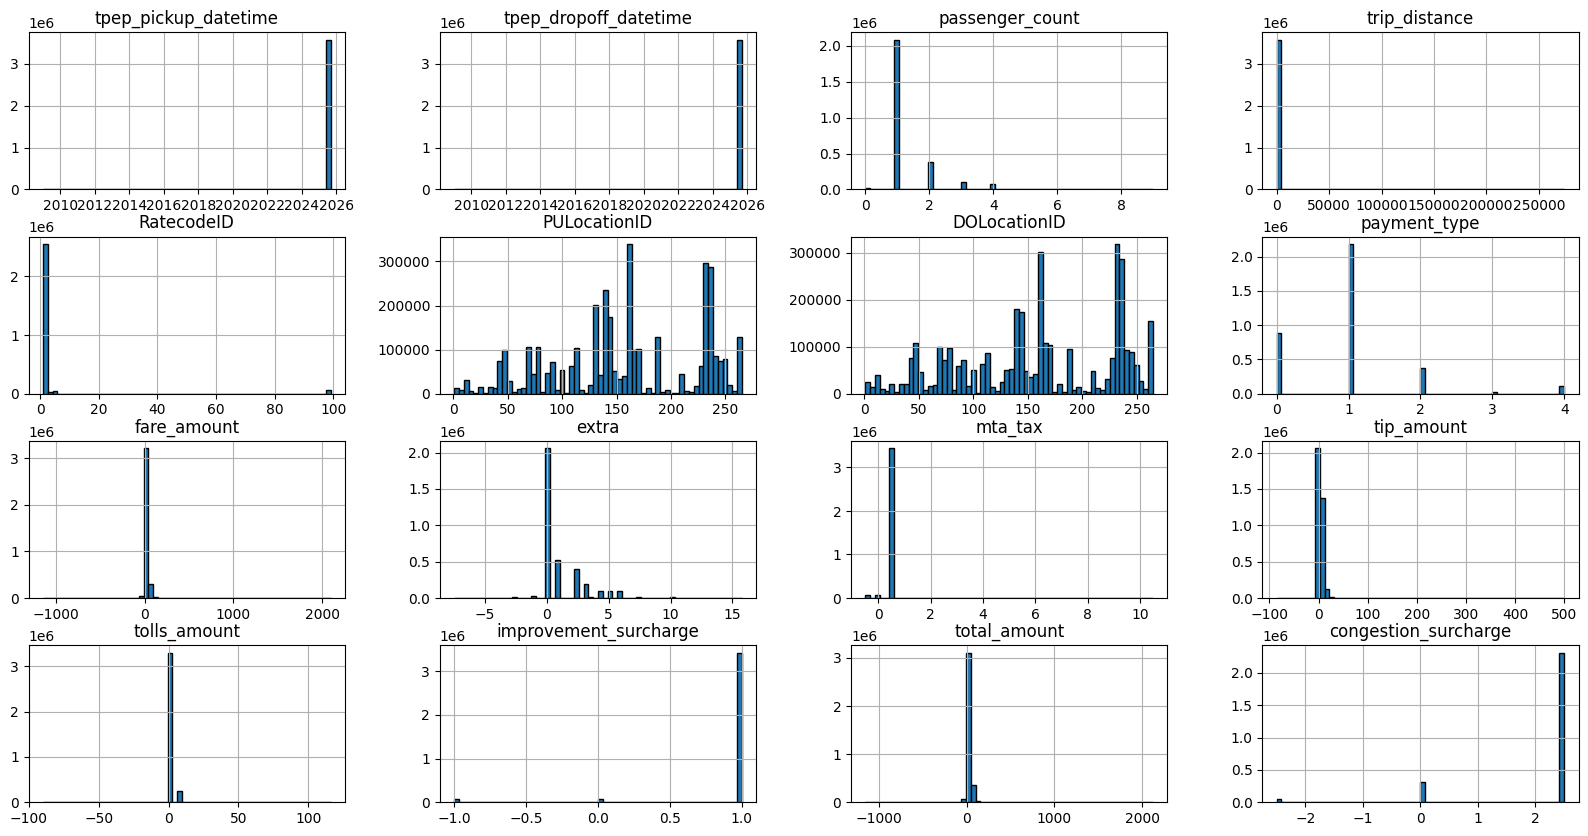

In [25]:
taxi_df.hist(figsize=(20, 10), bins=60, edgecolor='black')

Histogram plot for all columns except date time columns

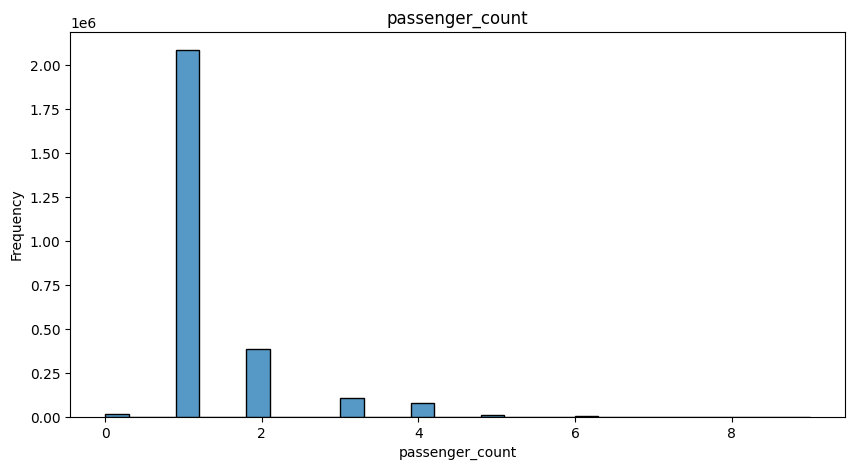

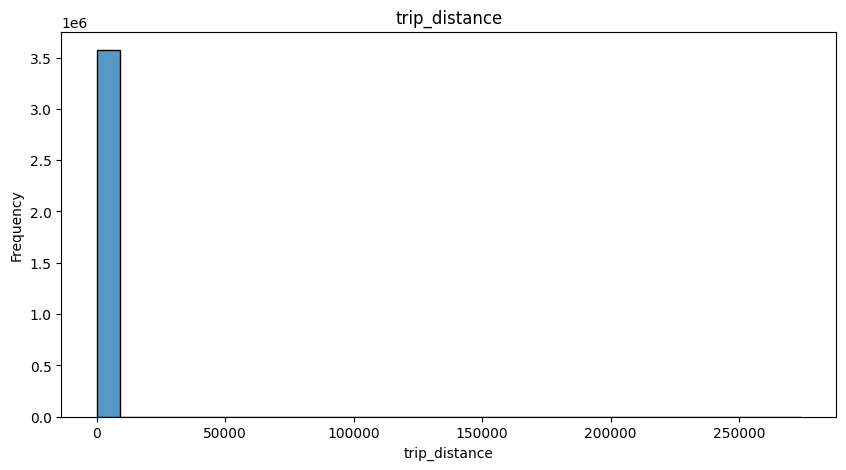

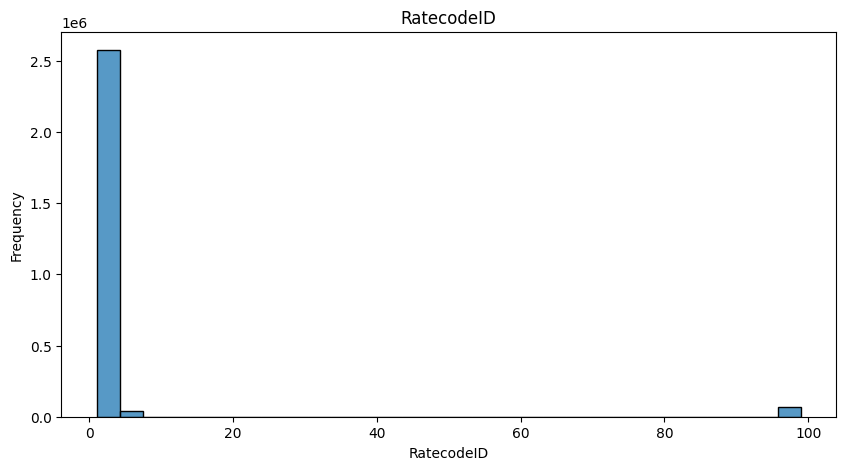

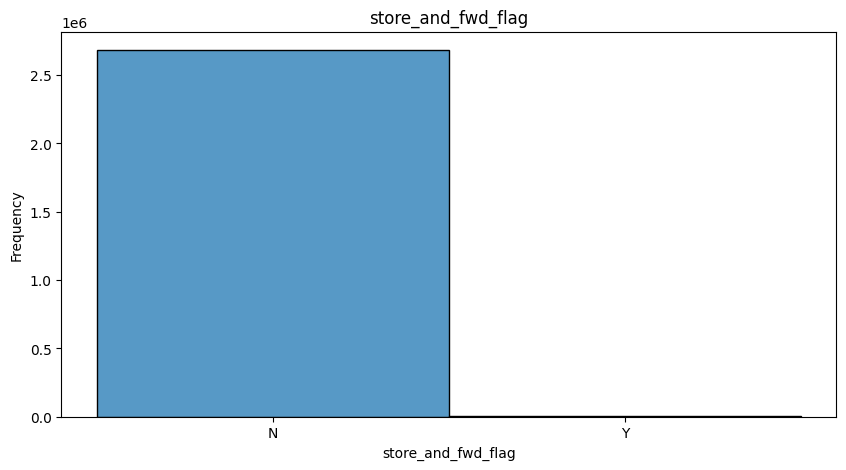

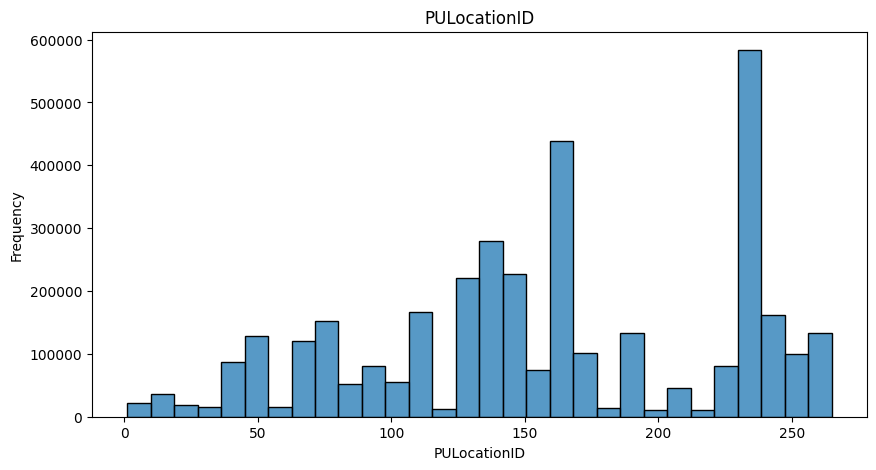

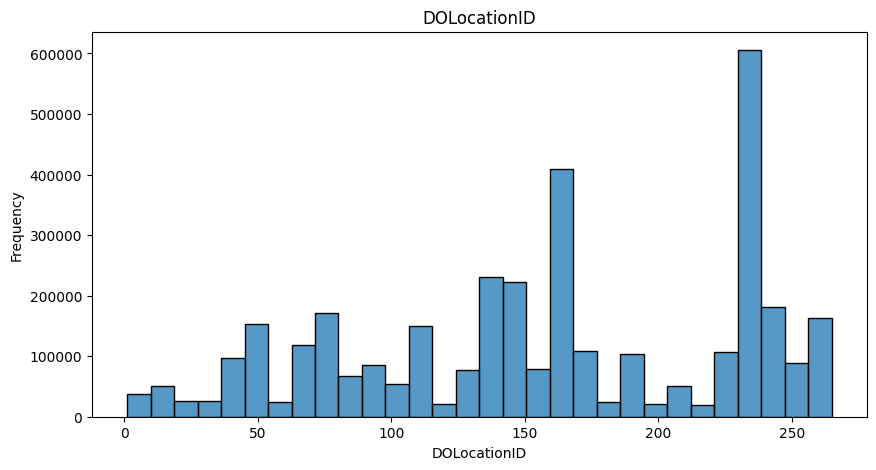

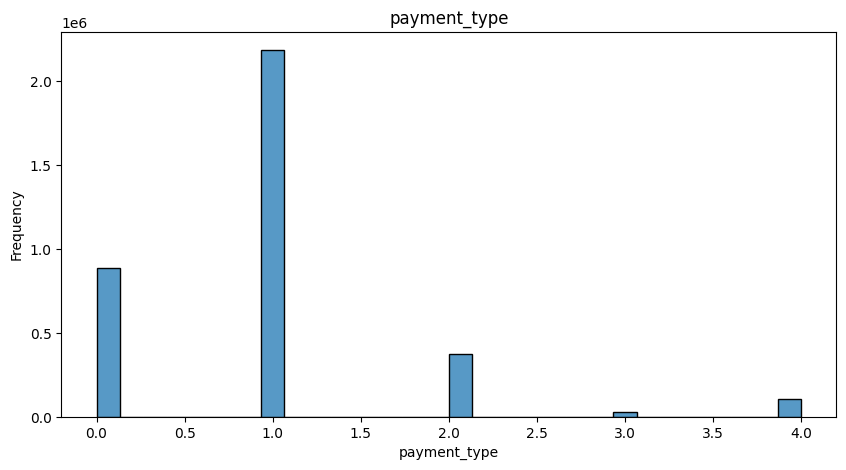

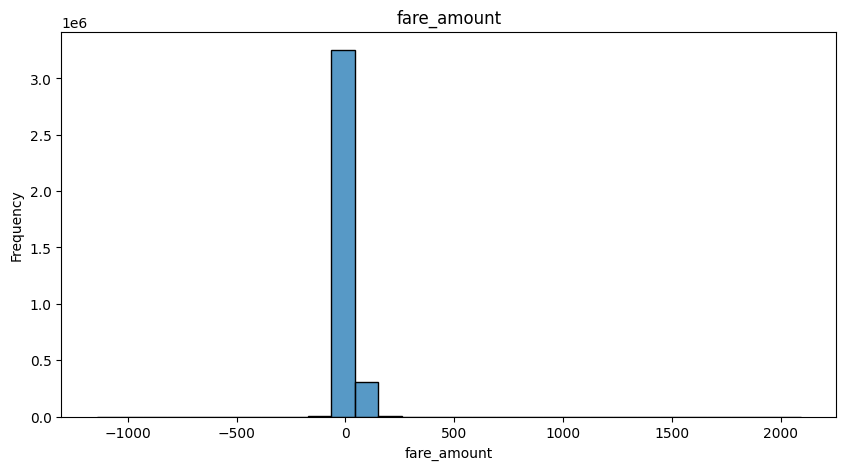

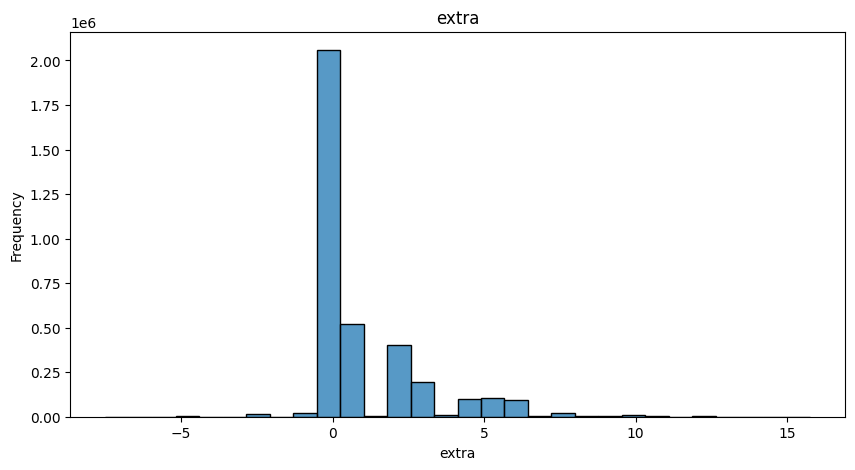

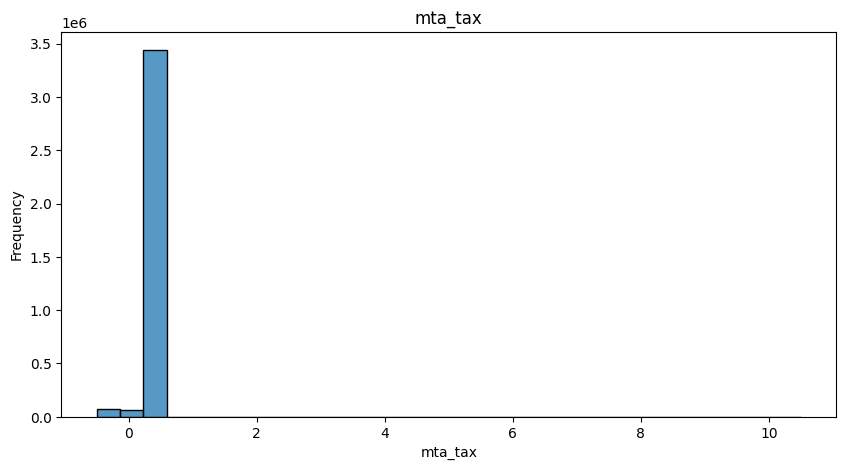

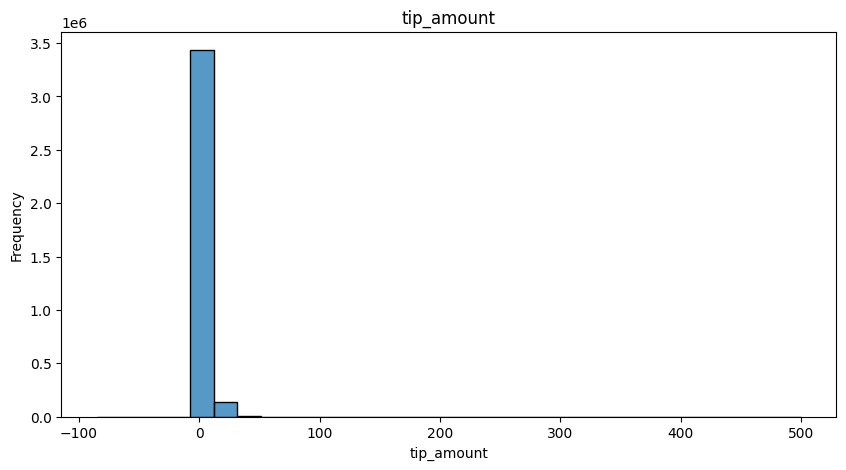

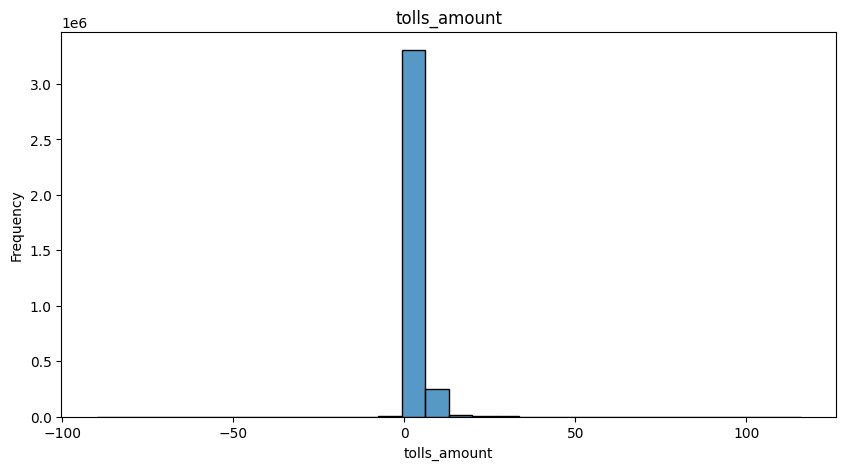

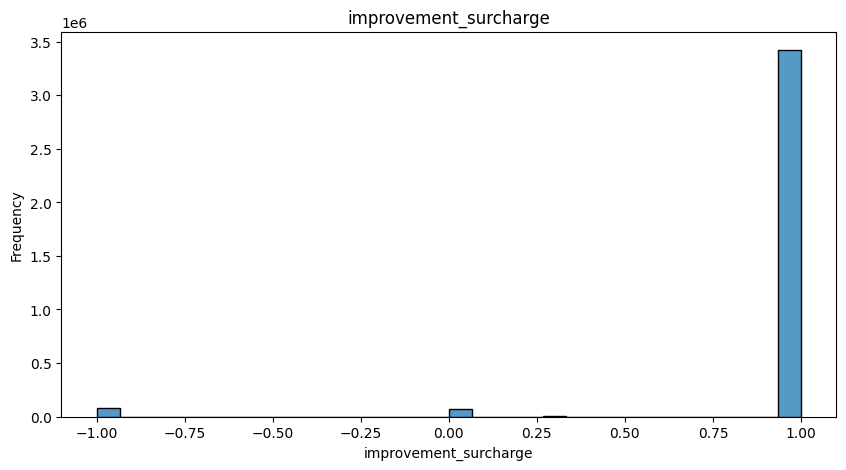

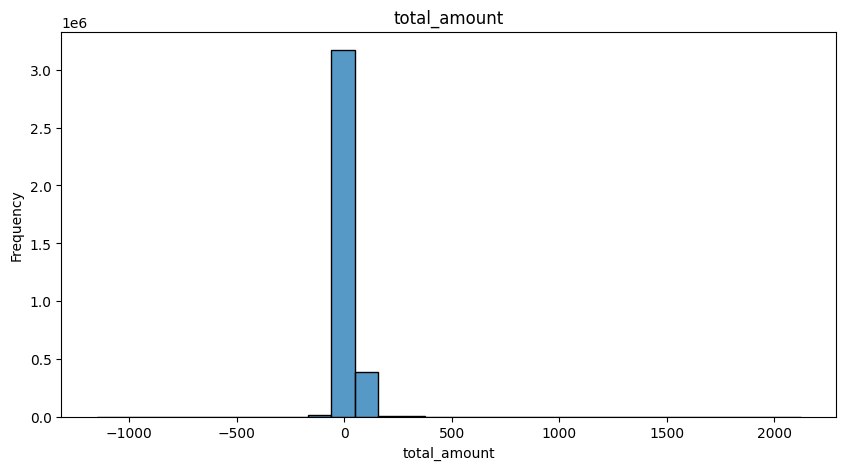

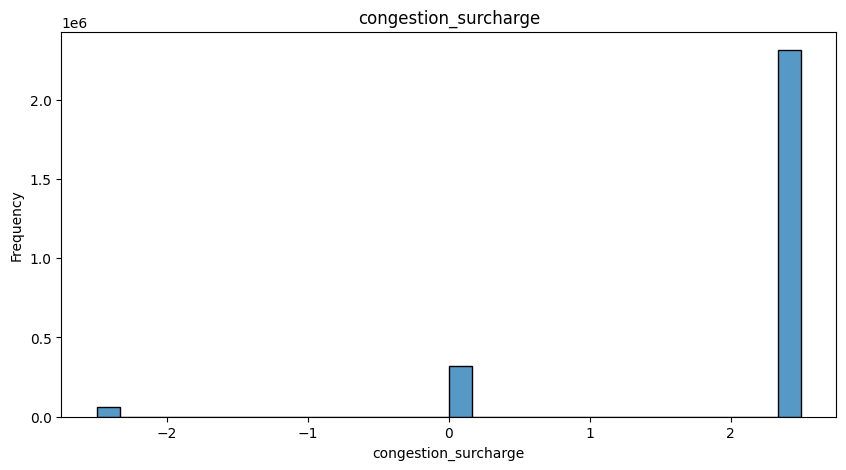

In [39]:
exclude_columns = ['tpep_pickup_datetime','tpep_dropoff_datetime']
for col in taxi_df:
    if col not in exclude_columns:
        plt.figure(figsize=(10,5))
        sns.histplot(taxi_df[col], bins=30)
        plt.title(f'{col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.show()

In [38]:
taxi_df['RatecodeID'].value_counts()

RatecodeID
1.0     2446064
2.0      102947
99.0      70383
5.0       43088
3.0       13569
4.0       11802
6.0           4
Name: count, dtype: int64

Scatter plot ---> Found that some rows are having negative values for total amount columns

<Axes: xlabel='index', ylabel='total_amount'>

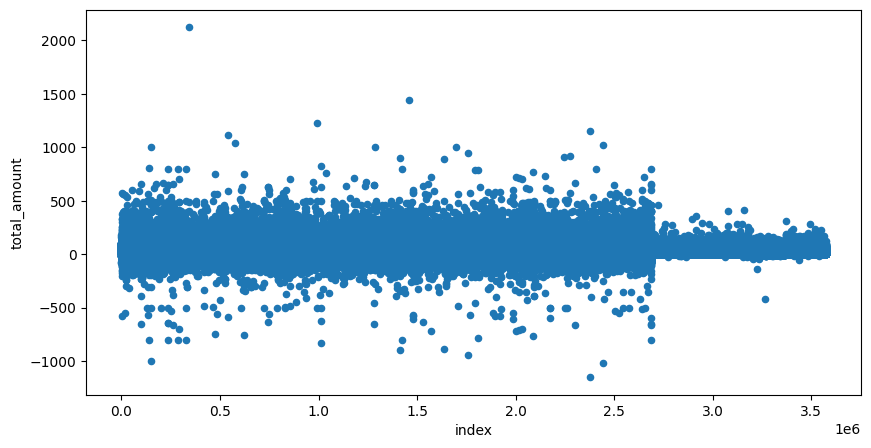

In [41]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index',figsize=(10,5))

In [56]:
## 87940 records are having negative values for total amount
len(taxi_df[taxi_df['total_amount']<0])

87940

In [57]:
taxi_df['total_amount'].mean()

26.388753778233408

In [73]:
## Replacing negative values with absolute values.
taxi_df.loc[:, "total_amount"] = taxi_df["total_amount"].abs()

3.Data cleaning

In [88]:
taxi_df_filtered = taxi_df[(taxi_df['total_amount']>=0) & (taxi_df['total_amount']<200)]
taxi_df_filtered.shape

(3570476, 17)

In [75]:
taxi_df.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          886234
trip_distance                 0
RatecodeID               886234
store_and_fwd_flag       886234
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     886234
dtype: int64

In [77]:
taxi_df.loc[:, "passenger_count"] = taxi_df["passenger_count"].round().astype("Int64")

In [89]:
taxi_df[taxi_df['passenger_count']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


4.Data Preparation

In [90]:
taxi_df_prepared = taxi_df_filtered.copy()

In [91]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   Int64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object